## Problem 3: How many people live near shopping centers? (8 points)

In the last step of this analysis, use a *spatial join* to relate data from a population grid data set to the buffer layer created in *problem 2* to find out how many people live in all population grid cells that are **within** 1.5 km distance from each shopping centre. 

Use the same population grid data set as during [lesson 3](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/spatial-join.html) (load it directly from WFS, don’t forget to assign a CRS).


*Feel free to divide your solution into more codeblocks than prepared! Remember to add comments to your code :)*

### a) Load the population grid data set and the buffer geometries (2 points)

Use the same population grid data set as during [lesson 3](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/spatial-join.html) (load it directly from WFS, don’t forget to assign a CRS). Load the data into a `GeoDataFrame` called `population_grid`.

(optional) If you want, discard unneeded columns and translate the remaining column names from Finnish to English.

In [20]:
# ADD YOUR OWN CODE HERE
import geopandas as gpd

import pathlib
DATA_DIRECTORY = pathlib.Path().resolve() / "data"

population_grid = gpd.read_file(DATA_DIRECTORY / "Vaestotietoruudukko_2022.shp")

population_grid.crs = "EPSG:3879"

population_grid

,INDEX,ASUKKAITA,ASVALJYYS,IKA0_9,IKA10_19,IKA20_29,IKA30_39,IKA40_49,IKA50_59,IKA60_69,IKA70_79,IKA_YLI80,geometry
0,688,5,5.060000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6689749.005, 25472499.9..."
1,703,5,5.140000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
2,710,8,4.450000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
3,711,7,6.414000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
4,715,10,4.520000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,27109,6,3.889000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25513249.999 6685998.998, 25513249.9..."
5834,27110,13,2.486000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25513249.999 6685748.999, 25513249.9..."
5835,27111,12,5.944000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25513249.999 6685499, 25513249.999 6..."
5836,27273,6,2.417000e+01,99,99,99,99,99,99,99,99,99,"POLYGON ((25513499.996 6685499, 25513499.996 6..."


In [21]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import geopandas
import pyproj

assert isinstance(population_grid, geopandas.GeoDataFrame)
assert population_grid.crs == pyproj.CRS("EPSG:3879")

In [22]:
population_grid = population_grid[["ASUKKAITA", "geometry"]]
population_grid = population_grid.rename(columns={"ASUKKAITA": "population"})

In [23]:
population_grid

,population,geometry
0,5,"POLYGON ((25472499.995 6689749.005, 25472499.9..."
1,5,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
2,8,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
3,7,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
4,10,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
...,...,...
5833,6,"POLYGON ((25513249.999 6685998.998, 25513249.9..."
5834,13,"POLYGON ((25513249.999 6685748.999, 25513249.9..."
5835,12,"POLYGON ((25513249.999 6685499, 25513249.999 6..."
5836,6,"POLYGON ((25513499.996 6685499, 25513499.996 6..."




Load the buffers computed in *problem 2* into a `GeoDataFrame` called `shopping_centre_buffers`. Add an `assert` statement to check whether the two data frames are in the same CRS.

In [24]:
# ADD YOUR OWN CODE HERE
shopping_centre_buffers = gpd.read_file(DATA_DIRECTORY / "shopping_centres.gpkg", layer="buffers")

In [25]:
shopping_centre_buffers

,address,id,name,addr,geometry
0,"CAP-Autokoulu, 1-7, Itäkatu, Itäkeskus, Vartio...",0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25505906.501 6677524.123, 25505899.2..."
1,"Change Lingerie, 14-20, Mannerheimintie, Kesku...",1,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland","POLYGON ((25498091.634 6672925.394, 25498084.4..."
2,"Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...",2,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland","POLYGON ((25486970.435 6672070.967, 25486963.2..."
3,"Taco Bell, 3-9, Leppävaarankatu, Ruusutorppa, ...",3,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland","POLYGON ((25491146.329 6678453.64, 25491139.10..."
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland","POLYGON ((25499443.932 6686656.982, 25499436.7..."
5,"Valaskala, 5, Hermannin rantatie, Verkkosaari,...",5,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland","POLYGON ((25500488.571 6674918.261, 25500481.3..."
6,"Mall of Tripla, 1, Fredikanterassi, Keski-Pasi...",6,Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland","POLYGON ((25497645.658 6676164.227, 25497638.4..."


In [26]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
assert isinstance(shopping_centre_buffers, geopandas.GeoDataFrame)
assert shopping_centre_buffers.geometry.geom_type.unique() == ["Polygon"]
assert shopping_centre_buffers.crs == pyproj.CRS("EPSG:3879")


---

### b) Carry out a *spatial join* between the `population_grid` and the `shopping_centre_buffers`  (2 points)

Join the shopping centre’s `id` column (and others, if you want) to the population grid data frame, for all population grid cells that are **within** the buffer area of each shopping centre. [Use a *join-type* that retains only rows from both input data frames for which the geometric predicate is true](https://geopandas.org/en/stable/gallery/spatial_joins.html#Types-of-spatial-joins). 


In [27]:
shopping_centre_buffers

,address,id,name,addr,geometry
0,"CAP-Autokoulu, 1-7, Itäkatu, Itäkeskus, Vartio...",0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25505906.501 6677524.123, 25505899.2..."
1,"Change Lingerie, 14-20, Mannerheimintie, Kesku...",1,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland","POLYGON ((25498091.634 6672925.394, 25498084.4..."
2,"Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...",2,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland","POLYGON ((25486970.435 6672070.967, 25486963.2..."
3,"Taco Bell, 3-9, Leppävaarankatu, Ruusutorppa, ...",3,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland","POLYGON ((25491146.329 6678453.64, 25491139.10..."
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland","POLYGON ((25499443.932 6686656.982, 25499436.7..."
5,"Valaskala, 5, Hermannin rantatie, Verkkosaari,...",5,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland","POLYGON ((25500488.571 6674918.261, 25500481.3..."
6,"Mall of Tripla, 1, Fredikanterassi, Keski-Pasi...",6,Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland","POLYGON ((25497645.658 6676164.227, 25497638.4..."


In [28]:
# ADD YOUR OWN CODE HERE
population_grid_with_shopping_centre_buffers = population_grid.sjoin(
    shopping_centre_buffers,
    how="inner",
    predicate="within"
)
population_grid_with_shopping_centre_buffers = population_grid_with_shopping_centre_buffers[["population", "geometry", "id", "name"]]

In [29]:
population_grid_with_shopping_centre_buffers.head()

,population,geometry,id,name
1134,134,"POLYGON ((25484250 6672499.005, 25484250 66727...",2,Iso-omena
1135,75,"POLYGON ((25484250 6672249.006, 25484250 66724...",2,Iso-omena
1136,20,"POLYGON ((25484250 6671748.997, 25484250 66719...",2,Iso-omena
1199,106,"POLYGON ((25484499.998 6672749.004, 25484499.9...",2,Iso-omena
1200,130,"POLYGON ((25484499.998 6672499.005, 25484499.9...",2,Iso-omena



---

### c) Compute the population sum around shopping centres (2 points)

Group the resulting (joint) data frame by shopping centre (`id` or `name`), and calculate the `sum()` of the population living inside the 1.5 km radius around them.

Print the results, for instance, in the form "12345 people live within 1.5 km from REDI".

In [30]:
# ADD YOUR OWN CODE HERE
# ADD YOUR OWN CODE HERE

#group by name
grouped = population_grid_with_shopping_centre_buffers.groupby("name")

#grouped.describe()

#calculate sum of each group
for key, group in grouped:
    #print sum of population in group
    print(f" {sum(group['population'])} people live within 1.5km from {key}")

#note no value for TRIPLA because it couldnt be geocoded

 55555 people live within 1.5km from Forum
 27885 people live within 1.5km from Iso-omena
 18843 people live within 1.5km from Itis
 11718 people live within 1.5km from Jumbo
 24173 people live within 1.5km from REDI
 26549 people live within 1.5km from Sello
 24686 people live within 1.5km from Tripla 


<Axes: >

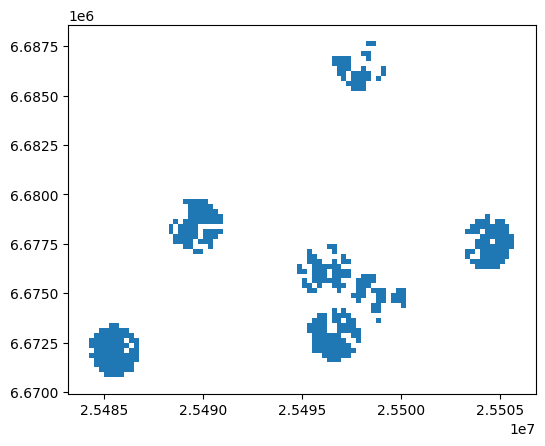

In [32]:
population_grid_with_shopping_centre_buffers.plot()


---

### d) Reflection

Good job! You are almost done with this week’s exercise. Please quickly answer the following short questions:
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

Add your answers in a new *Markdown* cell below: